In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as stats 

In [2]:
df = pd.read_excel('data.xlsx')

In [3]:
df = df.loc[((df['reject_flg'] == 0) & (df['account_flg'] == 1))]

In [4]:
len(df)

25262

In [5]:
df.groupby('age_segment')['invest_flg'].describe()

,count,mean,std,min,25%,50%,75%,max
age_segment,,,,,,,,
0-13,47.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
14-17,3552.0,0.057432,0.232700,0.0,0.0,0.0,0.0,1.0
18-22,4271.0,0.144697,0.351836,0.0,0.0,0.0,0.0,1.0
23-25,1599.0,0.169481,0.375294,0.0,0.0,0.0,0.0,1.0
26-30,2423.0,0.174577,0.379683,0.0,0.0,0.0,0.0,1.0
31-35,2243.0,0.172537,0.377931,0.0,0.0,0.0,0.0,1.0
36-40,1602.0,0.142322,0.349489,0.0,0.0,0.0,0.0,1.0
41-45,1124.0,0.134342,0.341171,0.0,0.0,0.0,0.0,1.0
46-50,756.0,0.144180,0.351505,0.0,0.0,0.0,0.0,1.0


In [6]:
df.dtypes

Unnamed: 0                    int64
application_id               object
primary_income_dt    datetime64[ns]
party_rk                    float64
product_code                 object
                          ...      
invest_flg                    int64
mobile_flg                    int64
out_c2c_flg                   int64
car_ins_flg                   int64
percent_flg                   int64
Length: 66, dtype: object

drop all object variables

product_code 

trial_type

application_id


In [7]:
df['channel_desc'] = pd.factorize(df['channel_desc'])[0]

In [8]:
df = df.drop(['product_code', 'trial_type', 'application_id'],axis=1)

In [9]:
df.select_dtypes('object')

,region_size,age_segment,res_segment
2,неизвестно,36-40,Восток СНГ
3,ГОРОД,14-17,РФ
6,ГОРОД,18-22,РФ
7,ГОРОД,Пусто,Пусто
8,ПОСЕЛОК ГОРОДСКОГО ТИПА,Пусто,Пусто
...,...,...,...
73698,неизвестно,14-17,РФ
73699,неизвестно,18-22,РФ
73703,ГОРОД,14-17,РФ
73704,ДЕРЕВНЯ,23-25,Восток СНГ


In [10]:
df = df.drop(['party_rk', 'primary_income_dt', 'Unnamed: 0', 'ccr_account_first_open_dt', 'dep_account_first_open_dt', 'cur_account_first_open_dt', 'sav_account_first_open_dt', 'cln_account_first_open_dt', 'pos_account_first_open_dt'],axis=1)

In [11]:
df.head()

,account_own_flg,sch_flg,success_flg,validation_flg,reject_flg,account_flg,utilization_flg,subscription_time,channel_desc,region_size,...,inkas_flg,cash_out_flg,vzr_flg,concierge_flg,cb_flg,invest_flg,mobile_flg,out_c2c_flg,car_ins_flg,percent_flg
2,0,1,0,0,0,1,0,8.771054e+04,0,неизвестно,...,0,0,0,0,0,0,0,0,0,0
3,0,1,1,0,0,1,1,2.772449e+06,0,ГОРОД,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,1,0,5.288322e+06,0,ГОРОД,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,1,1,NaN,1,ГОРОД,...,0,0,0,0,1,0,0,1,0,0
8,1,1,1,0,0,1,1,5.281746e+06,1,ПОСЕЛОК ГОРОДСКОГО ТИПА,...,0,0,0,0,0,1,0,0,0,0


In [12]:
df['subscription_time'] = df['subscription_time'].fillna(df['subscription_time'].median())

In [13]:
df.isna().sum()

account_own_flg        0
sch_flg                0
success_flg            0
validation_flg         0
reject_flg             0
account_flg            0
utilization_flg        0
subscription_time      0
channel_desc           0
region_size          277
metall_flg             0
age_segment           13
res_segment           13
open_cc_flg            0
util_cc_flg            0
open_cn_flg            0
util_cn_flg            0
open_sav_flg           0
util_sav_flg           0
open_dep_flg           0
util_dep_flg           0
open_mb_flg            0
util_mb_flg            0
open_inv_flg           0
util_inv_flg           0
in_5ms_cnt             0
in_3ms_cnt           246
in_1ms_cnt           268
out_5ms_puc_cnt        0
out_3ms_puc_cnt      246
out_1ms_puc_cnt      268
out_5ms_uch_cnt        0
out_3ms_uch_cnt      246
out_1ms_uch_cnt      268
out_5ms_all_cnt        0
out_3ms_all_cnt      246
out_1ms_all_cnt      268
in_total_5ms_amt       0
in_total_3ms_amt       0
in_total_1ms_amt       0


In [14]:
df = df.drop('res_segment', axis=1)

<Axes: xlabel='region_size', ylabel='invest_flg'>

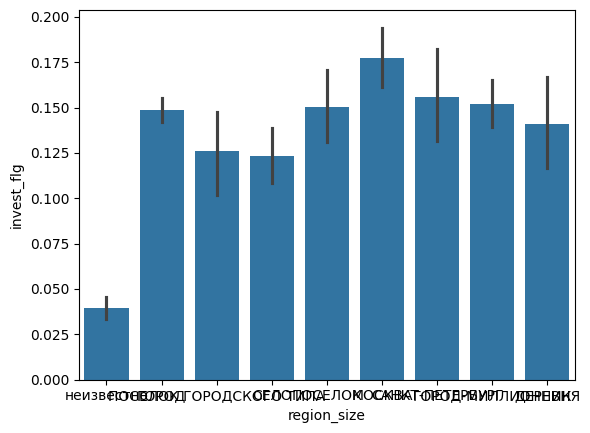

In [15]:
sns.barplot(data=df, x='region_size', y='invest_flg')

<Axes: xlabel='age_segment', ylabel='invest_flg'>

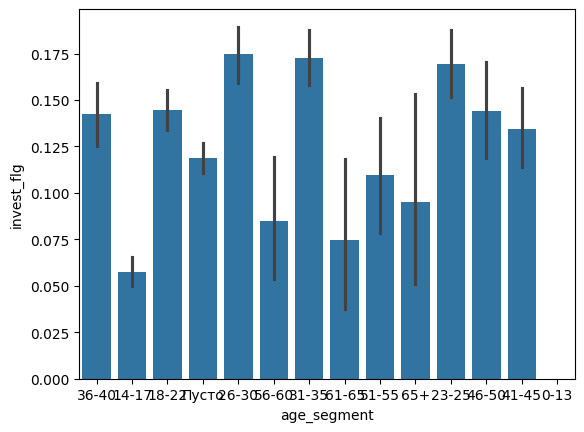

In [16]:
sns.barplot(data=df, x='age_segment', y='invest_flg')

In [17]:
len(df)

25262

<Axes: xlabel='invest_flg', ylabel='Count'>

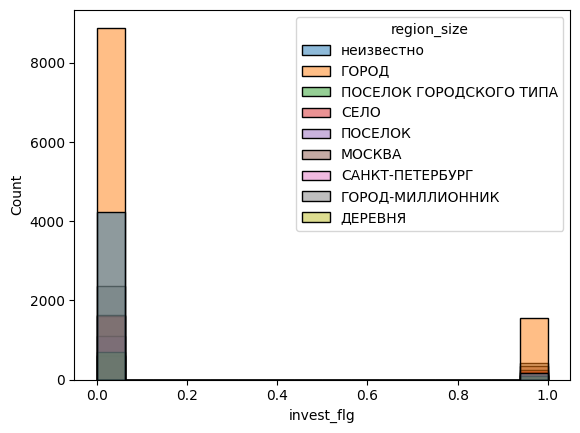

In [18]:
sns.histplot(data=df, x='invest_flg', hue='region_size')

In [19]:
df['age_segment'].value_counts()

age_segment
Пусто    6654
18-22    4271
14-17    3552
26-30    2423
31-35    2243
36-40    1602
23-25    1599
41-45    1124
46-50     756
51-55     420
56-60     260
61-65     161
65+       137
0-13       47
Name: count, dtype: int64

In [20]:
df = df.loc[df['age_segment'] != 'Пусто']

In [21]:
len(df)

18608

<Axes: xlabel='invest_flg', ylabel='Count'>

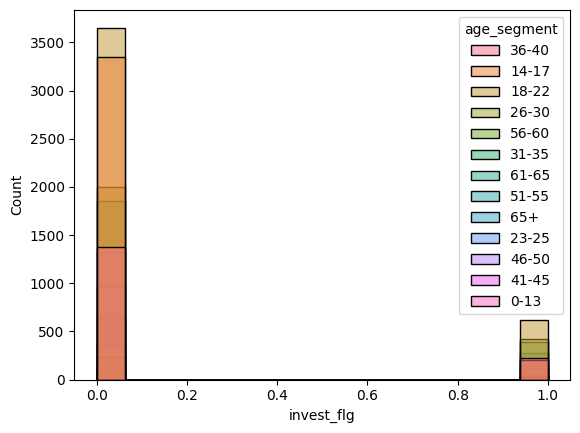

In [22]:
sns.histplot(data=df, x='invest_flg', hue='age_segment')

In [23]:
df.loc[df['age_segment']=='18-22']['invest_flg'].value_counts()

invest_flg
0    3653
1     618
Name: count, dtype: int64

In [24]:
df.loc[df['age_segment']=='26-30']['invest_flg'].value_counts()


invest_flg
0    2000
1     423
Name: count, dtype: int64

In [25]:
len(df)

18608

In [26]:
df['open_cc_flg'].value_counts()

open_cc_flg
0    17648
1      960
Name: count, dtype: int64

In [27]:
df['util_inv_flg'].value_counts()

util_inv_flg
0    17573
1     1035
Name: count, dtype: int64

<Axes: xlabel='open_inv_flg', ylabel='Count'>

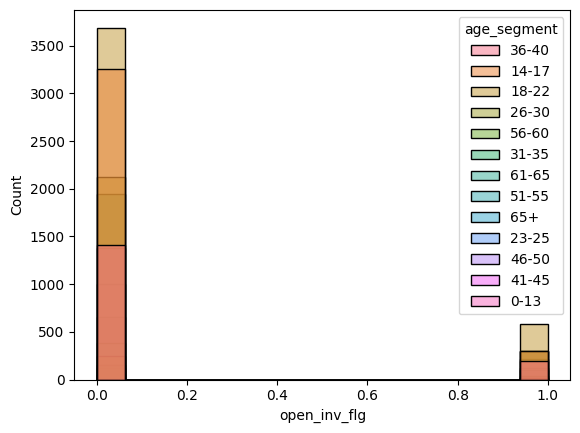

In [28]:
sns.histplot(data=df, x='open_inv_flg', hue='age_segment')

In [29]:
len(df)

18608

In [30]:
df['util_inv_flg'].value_counts()

util_inv_flg
0    17573
1     1035
Name: count, dtype: int64

In [31]:
df['utility'] = df['open_cc_flg'] + df['open_cn_flg'] + df['open_sav_flg'] + df['open_dep_flg'] + df['open_mb_flg'] + df['open_inv_flg'] 

In [32]:
len(df)

18608

<Axes: xlabel='utility', ylabel='Count'>

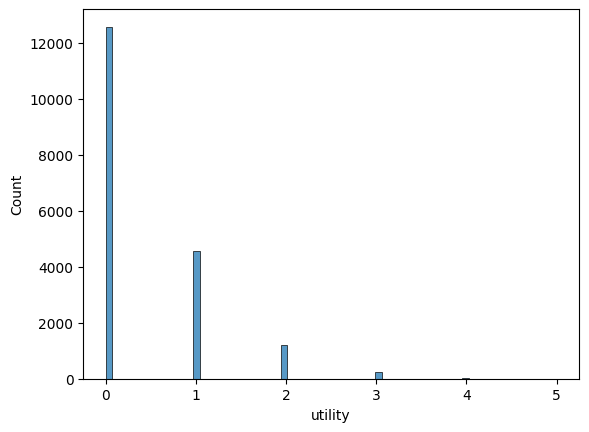

In [33]:
sns.histplot(df['utility'])

In [34]:
df['utility'].describe()

count    18608.000000
mean         0.419497
std          0.686980
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: utility, dtype: float64

In [35]:
len(df.loc[df['utility'] >= 1])

6031

In [36]:
df_util = df.loc[df['utility'] >= 1]

In [37]:
df_util = df_util.loc[df['region_size'] != 'неизвестно']
len(df_util)

5185

<Axes: xlabel='utility', ylabel='Count'>

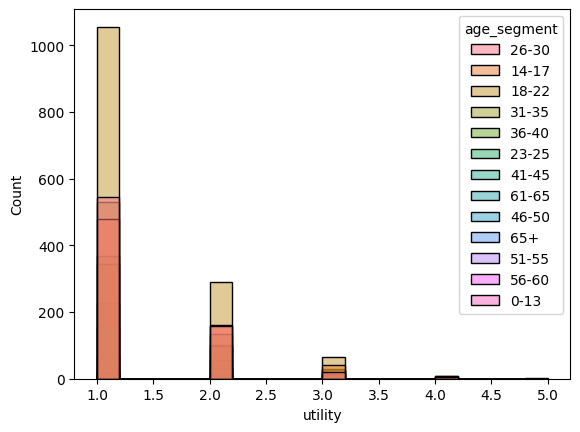

In [38]:
sns.histplot(data=df_util, x='utility', hue='age_segment', bins=20)

<Axes: xlabel='utility', ylabel='Count'>

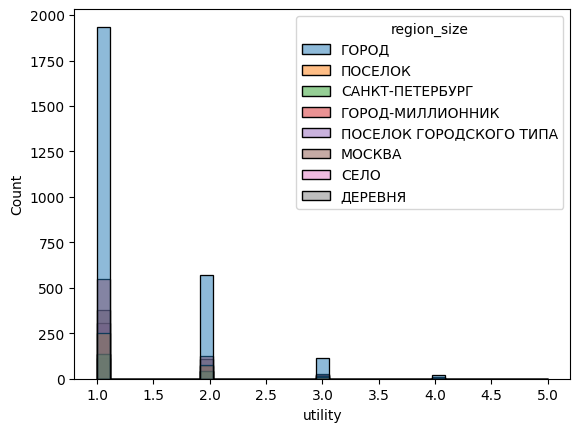

In [39]:
sns.histplot(data=df_util, x='utility', hue='region_size')

In [67]:
df = pd.read_excel("data.xlsx")

In [68]:
df['total_5ms'] = df['in_total_5ms_amt'] - df['out_total_5ms_amt']

In [69]:
df = df.loc[df['age_segment'] != 'Пусто']

In [70]:
df = df.loc[df['region_size'] != 'неизвестно']

<Axes: xlabel='in_total_5ms_amt', ylabel='open_inv_flg'>

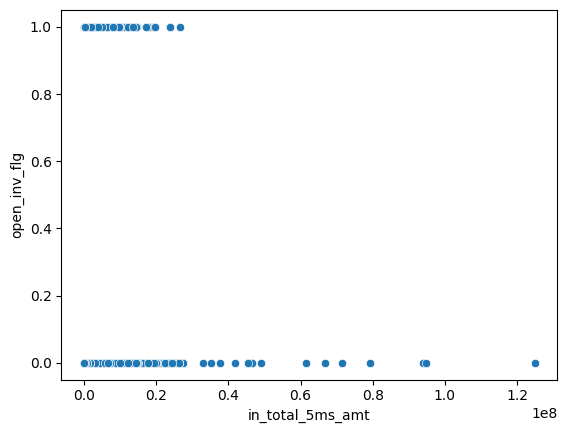

In [72]:
sns.scatterplot(df, x='in_total_5ms_amt', y='open_inv_flg')

In [74]:
df_not_premium = df.loc[((df['reject_flg'] == 1) & (df['account_flg'] == 0))]
len(df_not_premium)

12124

In [75]:
df_premium = df.loc[((df['reject_flg'] == 0) & (df['account_flg'] == 1))]
len(df_premium)

14741

<Axes: xlabel='open_inv_flg', ylabel='in_total_5ms_amt'>

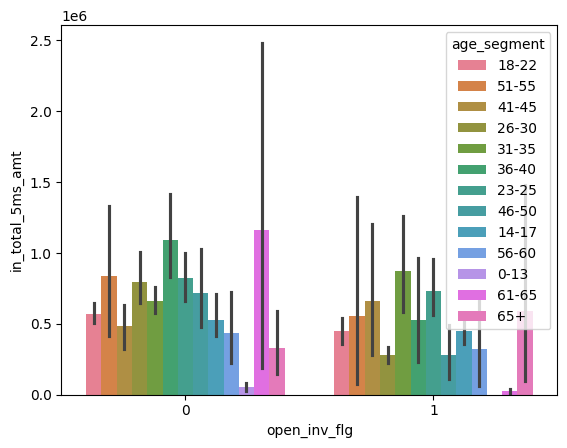

In [76]:
sns.barplot(data=df_not_premium, x='open_inv_flg', y='in_total_5ms_amt', hue='age_segment')

<Axes: xlabel='open_inv_flg', ylabel='in_total_5ms_amt'>

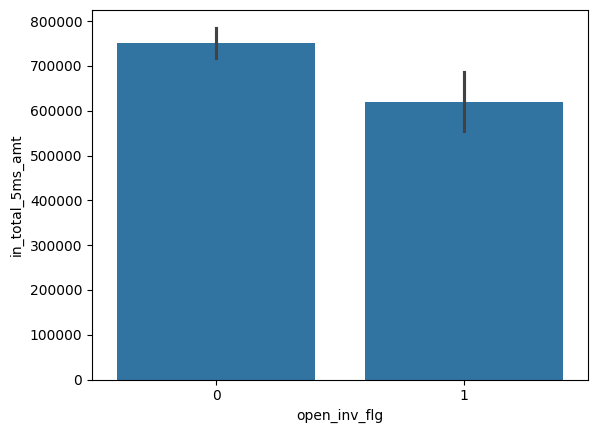

In [77]:
sns.barplot(data=df_premium, x='open_inv_flg', y='in_total_5ms_amt')

In [22]:
df_premium['trial_type'].value_counts()

trial_type
1 mon     14019
2 mons       19
3 mons        8
5 mons        4
4 mons        2
6 mons        1
Name: count, dtype: int64

In [25]:
df_premium = df_premium.loc[df_premium['trial_type'] == '1 mon']
len(df_premium)

14019

<Axes: xlabel='util_inv_flg', ylabel='in_total_5ms_amt'>

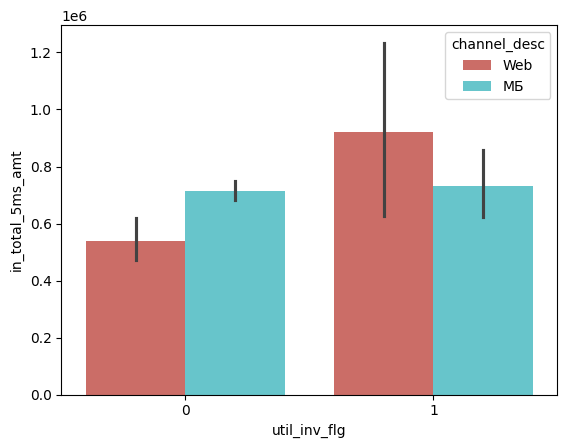

In [31]:
sns.barplot(data=df_premium, x='util_inv_flg', y='in_total_5ms_amt', hue='channel_desc', palette='hls')